<a href="https://colab.research.google.com/github/chiraswykj/ml-lab-028/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


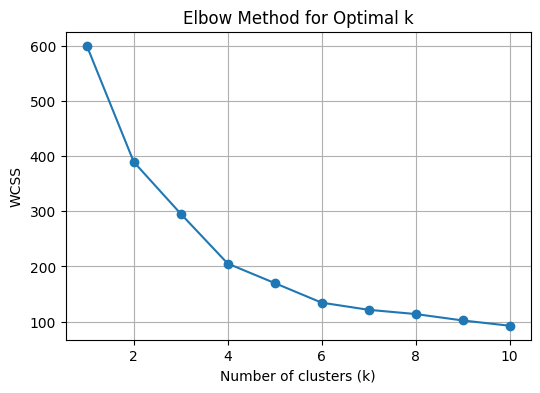


Data with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


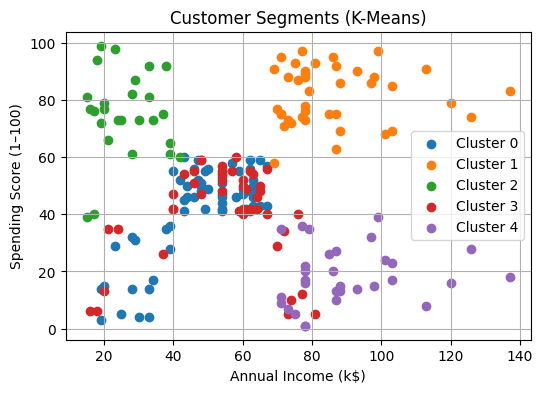

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(data_url)

print("First 5 rows:")
print(df.head())

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init="k-means++", random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
print("\nData with cluster labels:")
print(df.head())

plt.figure(figsize=(6, 4))
for c in range(k_optimal):
    cluster_points = df[df["Cluster"] == c]
    plt.scatter(
        cluster_points["Annual Income (k$)"],
        cluster_points["Spending Score (1-100)"],
        label=f"Cluster {c}"
    )

plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(True)
plt.show()
